<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/Updated_Hypergraph_Models_071923_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math as math
from math import log
import seaborn as sns
import pandas as pd

## Part 1: Hypergraph Generation
The following steps generate a hyper graph using the XGI/HyperNetX python package,  following power-law degree distribution for predifined number of nodes n, number of hyperedges num_hyper_edges, degree exponent gamma, using a configuration model with data stored in a dictionary.

In [ ]:
# Step 1: Generate Degree Sequence
def generate_degree_sequence(n, gamma, kmin):
    # Generate a random set from the power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values
    kmax = int(np.sqrt(n))
    # kmax = int(1.5*n**(1/4)) # max degree allowed is 1.5*n^(1/4)
    degrees = degrees[(degrees >= kmin) & (degrees <= kmax)].astype(int)

    # Truncate or pad the sequence to match the length specified
    if len(degrees) >= n:
        degrees = degrees[:n]
    else:
        degrees = np.concatenate((degrees, np.full(n - len(degrees), kmin)))

    return degrees.tolist()

# Step 2: Generate Hyper Edge Size Sequence
def generate_hyper_edge_sizes(degrees, num_hyper_edges):
    total_degrees = sum(degrees)
    hyper_edge_sizes = []

    # Calculate the average size for each hyper edge
    avg_size = total_degrees // num_hyper_edges
    remainder = total_degrees % num_hyper_edges

    # Define the range for the random distribution
    min_size = 1  # Lower bound of the range
    max_size = len(degrees)-num_hyper_edges  # Upper bound of the range

    # Generate hyper edge sizes
    for _ in range(num_hyper_edges):
        size = random.randint(min_size, max_size)
        hyper_edge_sizes.append(size)

    return hyper_edge_sizes


# Step 3: Create Copies of Nodes
def create_node_copies(degrees):
    node_copies = []
    for i, degree in enumerate(degrees):
        for _ in range(degree):
            node_copies.append(i)
    return node_copies

# Step 4: Create Copies of Hyper Edges
def create_hyper_edge_copies(hyper_edge_sizes):
    hyper_edge_copies = []
    for i, size in enumerate(hyper_edge_sizes):
        for _ in range(size):
            hyper_edge_copies.append(i)
    return hyper_edge_copies

# Step 5: Randomly Pair Copies
def randomly_pair_copies(node_copies, hyper_edge_copies):
    random.shuffle(node_copies)
    random.shuffle(hyper_edge_copies)
    pairs = []
    for i in range(len(node_copies)):
        pairs.append((node_copies[i], hyper_edge_copies[i]))
    return pairs

# Step 6: Convert Bipartite Graph to A Hypergraph Dictionary
def convert_to_hypergraph(pairs):
    hypergraph = {}
    for pair in pairs:
        node, hyper_edge = pair
        if hyper_edge in hypergraph:
            hypergraph[hyper_edge].append(node)
        else:
            hypergraph[hyper_edge] = [node]
    return hypergraph


In [ ]:
def build_hypergraph(n, gamma, kmin, num_hyper_edges):
    # Step 1: Generate Degree Sequence
    degrees = generate_degree_sequence(n, gamma, kmin)
    print("Degree Sequence: ", degrees)

    # Step 2: Generate Hyper Edge Size Sequence
    hyper_edge_sizes = generate_hyper_edge_sizes(degrees, num_hyper_edges)
    print("Hyper Edge Sizes: ", hyper_edge_sizes)

    # Step 3: Create Copies of Nodes
    node_copies = create_node_copies(degrees)

    # Step 4: Create Copies of Hyper Edges
    hyper_edge_copies = create_hyper_edge_copies(hyper_edge_sizes)

    # Step 5: Randomly Pair Copies
    pairs = randomly_pair_copies(node_copies, hyper_edge_copies)

    # Step 6: Convert Bipartite Graph to Hypergraph
    hyperedge_dict = convert_to_hypergraph(pairs)

    # Print the resulting hypergraph
    print("Hypergraph Dictionary: ", hyperedge_dict)

    return degrees, hyperedge_dict


In [ ]:
!pip install hypernetx
import hypernetx as hnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.5/95.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 40.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you ha

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


Degree Sequence:  [3, 3, 3, 3, 3, 4, 3, 5, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Hyper Edge Sizes:  [16, 30, 8, 19, 38, 19, 32, 35]
Hypergraph Dictionary:  {1: [22, 10, 27, 22, 13, 18, 39, 15, 42, 26, 21, 42, 10, 23, 36, 14, 22, 40, 17, 0, 38, 29, 3, 46, 31, 8, 6, 0], 6: [47, 8, 7, 26, 27, 11, 44, 37, 34, 47, 48, 10, 17, 13, 38, 18, 28, 24, 43, 7, 1, 37, 14, 7, 4, 9, 38, 35], 7: [28, 40, 40, 16, 7, 30, 28, 21, 13, 49, 45, 44, 30, 41, 45, 39, 48, 16, 48, 41, 32, 31, 25, 8, 43, 0, 25, 36], 4: [23, 46, 47, 2, 15, 44, 24, 4, 2, 10, 31, 6, 49, 20, 5, 21, 18, 37, 11, 5, 29, 14, 9, 26], 5: [6, 45, 11, 20, 27, 4, 46, 16, 20, 1, 34, 33, 29, 15, 33, 3, 41], 3: [35, 19, 43, 32, 9, 30, 24, 12, 12, 7, 49, 32, 34], 2: [36, 39, 12, 5, 17, 2], 0: [19, 35, 1, 33, 42, 19, 3, 23, 25, 5]}


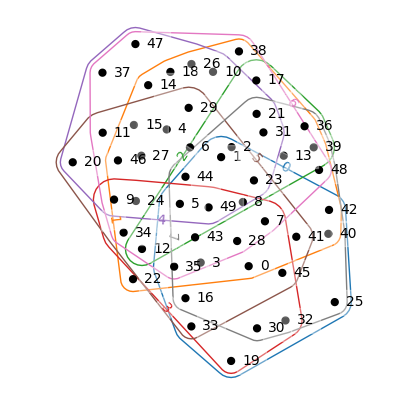

In [ ]:
# Test 1
n =50  # Number of nodes
gamma = 2.5  # Power-law exponent
kmin = 3  # Minimum degree
num_hyper_edges = 8  # Desired number of hyper edges

degrees, hyperedge_dict = build_hypergraph(n, gamma, kmin, num_hyper_edges)
# Plot the hypergraph
H = hnx.Hypergraph(hyperedge_dict)
plt.subplots(figsize=(5,5))
hnx.draw(H)

In [ ]:
# Test 2
n2 =400  # Number of nodes
gamma2 = 2.25  # Power-law exponent
kmin2 = 3  # Minimum degree
num_hyper_edges2 = 100  # Desired number of hyper edges

degrees2, hyperedge_dict2 = build_hypergraph(n2, gamma2, kmin2, num_hyper_edges2)
H2 = hnx.Hypergraph(hyperedge_dict2)

Degree Sequence:  [3, 5, 4, 4, 4, 7, 3, 3, 14, 5, 5, 3, 4, 3, 4, 3, 3, 6, 6, 3, 8, 5, 4, 3, 3, 11, 3, 6, 6, 13, 4, 19, 14, 8, 8, 4, 4, 8, 5, 3, 4, 3, 7, 10, 15, 12, 3, 3, 13, 4, 4, 5, 3, 3, 3, 3, 4, 13, 13, 3, 4, 13, 3, 5, 3, 3, 4, 3, 6, 9, 3, 7, 4, 3, 19, 4, 4, 8, 4, 3, 4, 3, 16, 6, 3, 3, 9, 12, 3, 6, 3, 5, 6, 4, 3, 18, 3, 3, 11, 5, 3, 3, 3, 7, 3, 8, 5, 4, 6, 5, 7, 7, 5, 3, 3, 10, 6, 4, 3, 3, 6, 3, 3, 5, 3, 3, 4, 4, 3, 9, 5, 3, 3, 3, 3, 14, 11, 3, 3, 11, 3, 7, 10, 3, 14, 4, 7, 3, 3, 3, 11, 3, 4, 5, 3, 10, 3, 7, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
# Test 3
n3 =400  # Number of nodes
gamma3 = 2.5  # Power-law exponent
kmin3 = 3  # Minimum degree
num_hyper_edges3 = 100  # Desired number of hyper edges

degrees3, hyperedge_dict3 = build_hypergraph(n3, gamma3, kmin3, num_hyper_edges3)
H3 = hnx.Hypergraph(hyperedge_dict3)

Degree Sequence:  [4, 8, 5, 3, 3, 5, 3, 6, 3, 3, 3, 3, 10, 6, 3, 4, 4, 3, 6, 4, 4, 4, 3, 4, 14, 3, 3, 10, 5, 3, 6, 8, 6, 3, 3, 3, 3, 13, 6, 3, 6, 3, 3, 4, 17, 9, 3, 5, 3, 3, 4, 3, 3, 9, 4, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 11, 3, 4, 6, 9, 3, 11, 4, 9, 4, 3, 3, 3, 15, 3, 7, 4, 3, 3, 3, 5, 3, 3, 4, 8, 5, 5, 3, 3, 4, 5, 3, 3, 15, 3, 5, 3, 3, 5, 3, 3, 5, 5, 11, 7, 4, 4, 3, 3, 4, 3, 4, 3, 7, 3, 3, 7, 3, 10, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

In [ ]:
# Test 4
n4 =400  # Number of nodes
gamma4 = 2.75  # Power-law exponent
kmin4 = 3  # Minimum degree
num_hyper_edges4 = 100  # Desired number of hyper edges

degrees4, hyperedge_dict4 = build_hypergraph(n4, gamma4, kmin4, num_hyper_edges4)
H4 = hnx.Hypergraph(hyperedge_dict4)


Degree Sequence:  [6, 3, 4, 5, 3, 3, 5, 3, 3, 12, 17, 6, 4, 3, 3, 3, 11, 4, 10, 10, 4, 3, 3, 5, 5, 8, 8, 13, 5, 4, 3, 4, 3, 16, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 9, 3, 4, 7, 4, 3, 3, 5, 11, 4, 5, 3, 3, 5, 4, 3, 8, 3, 3, 4, 5, 7, 4, 4, 3, 4, 3, 5, 10, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 5, 6, 3, 7, 3, 3, 3, 5, 3, 3, 3, 3, 7, 3, 3, 3, 5, 19, 4, 3, 3, 7, 5, 5, 4, 3, 4, 3, 4, 5, 3, 9, 6, 5, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

## Part 2: Assign Threshold
The following steps assigns a threshold value to each node in the network. The threshold follows a uniform or normal distribution with predefined mean (mu) and standard deviation (sigma).

In [ ]:
import numpy as np
import random

# Defines the parameters to be used
mu = 0.1
sigma = 0.05

# Function to assign thresholds to the individual nodes
def assign_thresholds(hypergraph):
    NV = hypergraph.order()
    Ltre = {}

    for node in hypergraph.nodes():
          # Uniform distribution: #
          #Ltre[node] = np.random.uniform()
          # Normal distrution
          while True:
              threshold = random.gauss(mu, sigma)
              if 0 < threshold < 1:
                  break
          Ltre[node] = threshold

    return Ltre

#Ltre = assign_thresholds(H)

#print("Threshold List for Nodes: ", Ltre )

In [ ]:
Ltre2 = assign_thresholds(H2)

print("Threshold List for Nodes: ", Ltre2 )

Threshold List for Nodes:  {0: 0.05994840320899818, 1: 0.1334621697526982, 2: 0.10058736745875652, 3: 0.09112684545477882, 4: 0.13167287301579098, 5: 0.07010084053768303, 6: 0.19078867756602177, 7: 0.07314751808904728, 8: 0.15417882053075538, 9: 0.0466541902695536, 10: 0.11960346315878394, 11: 0.1087617422800429, 12: 0.05788637767801318, 13: 0.07126985282283106, 14: 0.07527514950322443, 15: 0.10257958852420976, 16: 0.1684352644768507, 17: 0.06705433807726989, 18: 0.10628112423809281, 19: 0.0817865613847473, 20: 0.23389527593376563, 21: 0.08273103315317935, 22: 0.14957152885816077, 23: 0.06609410893346936, 24: 0.09136801073748692, 25: 0.12447141004687678, 26: 0.14042443694553539, 27: 0.05322865975182454, 28: 0.13854554190574045, 29: 0.10959313930998978, 30: 0.09137389653031308, 31: 0.13855205862185355, 32: 0.12216752838157126, 33: 0.10112019545885587, 34: 0.02676627829635038, 35: 0.11684786317697873, 36: 0.19155720400975457, 37: 0.14147270714125704, 38: 0.08398996904977724, 39: 0.027537

## Part 3: Rumor Spreading on Hypergraph
The follow steps extends the basic rumor spreading model to a hypergraph. An infection or recovery event can only happen if its infected or recovered neighbors reach a pre-assigned threshold.  

In [ ]:
def rumor_hyperedge_2(nw, ldeg, mu, lam, alp, n_samp):
    t_max = 10000
    N = nw.order()
    kmax = max(ldeg)
    sigma = 0.05
    ltre = assign_thresholds(nw)

    t_end = 0
    stifler_fractions = []

    for i_samp in range(1, n_samp+1):
        t = 0
        N_rec = 0

        states = {j: 0 for j in nw.nodes()}

        inf = []
        rec = []
        initial_node = np.random.choice(list(nw.nodes()))
        states[initial_node] = 1
        inf.append(initial_node)
        N_inf = 1
        N_e = nw.degree(initial_node)

        while N_inf != 0:
            total_rate = lam * N_e + 2 * alp * N_e
            tau = -np.log(np.random.uniform(1e-6, 1)) / total_rate
            t += tau

            if t >= t_max:
                break

            #print("Current time:", t)
            #print("Infected nodes:", inf)
            #print("Recovered nodes:", rec)
            #print("N_inf:", N_inf)
            #print("N_e:", N_e)
            #plt.figure()
            #plot_hypergraph(H, states)

            # Determine which event occurs
            event = np.random.uniform()
            p1 = lam / (lam + 2 * alp)
            p2 = (lam + alp )/ (lam + 2 * alp)

            # Determine if accept selected spreader based on degree distribution
            q_deg = np.random.uniform()


            # Infection:
            if event <= p1:
                # Select a spreader individual to spread the rumor
                inf_node = random.choice(inf)
                if q_deg < ldeg[inf_node] / kmax:
                    # Select a random hyper edge containing the infected node
                    infected_hyper_edge = np.random.choice(list(nw.edges()))
                    neighbors = nw[infected_hyper_edge]
                    while inf_node not in neighbors:
                        infected_hyper_edge = np.random.choice(list(nw.edges()))
                        neighbors = nw[infected_hyper_edge]

                    # Check if any neighbor meets the infection threshold
                    for neighbor in neighbors:
                        # Check if the selected neighbor is ignorant
                            if states[neighbor] == 0:
                                #print("Infection event")
                            # Check the threshold
                                count_inf_neighbors = sum(states[node] == 1 for node in nw.neighbors(neighbor))
                                if count_inf_neighbors / len(nw.neighbors(neighbor)) >= ltre[neighbor]:
                                    states[neighbor] = 1  # ignorant neighbor becomes spreader
                                    inf.append(neighbor)
                                    N_inf += 1
                                    #print("successful infection")


            else:  # Recovery
                # Select a spreader individual to recover
                rec_node = np.random.choice(inf)
                if q_deg < ldeg[rec_node] / kmax:
                    # Select a random hyperedge containing the recovered node
                    recovered_hyper_edge = np.random.choice(list(nw.edges()))
                    # Get neighbors list
                    neighbors = nw[recovered_hyper_edge]
                    #print("Recovery event", neighbors)
                    if event <=p2:
                        count_rec_neighbors = sum(states[node] == 2 for node in neighbors)
                        #print("count_rec_neighbors", count_rec_neighbors)
                        if count_rec_neighbors / len(neighbors) >= ltre[rec_node]:
                        #if count_rec_neighbors > 0:
                            # Update spreader to stifler if the selected neighbor is a stifler or spreader
                            states[rec_node] = 2
                            N_inf -= 1
                            inf.remove(rec_node)
                            rec.append(rec_node)
                            N_rec += 1
                            #print("successful recovery")

                    else:
                        count_rec_neighbors = sum(states[node] == 1 for node in neighbors)
                        #print("count_rec_neighbors", count_rec_neighbors)
                        if count_rec_neighbors / len(neighbors) >= ltre[rec_node]:
                        #if count_rec_neighbors > 0:
                            # Update spreader to stifler if the selected neighbor is a stifler or spreader
                            states[rec_node] = 2
                            N_inf -= 1
                            inf.remove(rec_node)
                            rec.append(rec_node)
                            N_rec += 1
                            #print("successful recovery")

                    """
                    else:
                        for neighbor in neighbors:
                        # Check the threshold of infected
                            count_inf_neighbors = 0
                            for node in neighbors:
                                if states[node] == 1:
                                    count_inf_neighbors += 1
                            if count_inf_neighbors / len(neighbors) >= Ltre[rec_node]:
                                # Update spreader to stifler if the selected neighbor is a stifler
                                states[rec_node] = 2
                                N_inf -= 1
                                N_e -= nw.degree(rec_node)
                                inf.remove(rec_node)
                                rec.append(rec_node)
                                N_rec += 1
                    """
            #print("N_inf after event:", N_inf)
            #print("N_e after event:", N_e)


        if N_inf == 0:
              t_end += t
              stifler_frac = N_rec / N
              stifler_fractions.append(stifler_frac)
              #print("Sampling result - Lam:", lam, "N_rec:", N_rec, "t_end:", t_end, "stifler_frac:", stifler_frac)

    avg_stifler_frac = sum(stifler_fractions) / len(stifler_fractions)
    t_end_av = t_end/n_samp

    #return nw, states
    return avg_stifler_frac, t_end_av

The following function generates the hypergraph based on nodes' disease status, where susceptible nodes are yellow, infected nodes are purple, and recovered nodes are green.

In [ ]:
def plot_hypergraph(hypergraph, states):
    pos = nx.spring_layout(hypergraph)
    node_colors = []
    #node_sizes = []
    for node in hypergraph.nodes():
        if states[node] == 1:  # Infected node (purple)
            node_colors.append("purple")
        elif states[node] == 2:  # Recovered node (green)
            node_colors.append("green")
        else:  # Susceptible node (yellow)
            node_colors.append("yellow")
        #node_sizes.append(thresholds[node] * 100)  # Adjust node size based on threshold value

    hnx.drawing.draw(hypergraph, pos, nodes_kwargs={'facecolors': node_colors})

Sampling result - Lam: 0.1 N_rec: 399 t_end: 366.856353914761 stifler_frac: 0.9975
Sampling result - Lam: 0.1 N_rec: 395 t_end: 435.37592434375364 stifler_frac: 0.9875
Sampling result - Lam: 0.1 N_rec: 371 t_end: 865.0839847570442 stifler_frac: 0.9275
Sampling result - Lam: 0.1 N_rec: 1 t_end: 866.8630574609454 stifler_frac: 0.0025
Sampling result - Lam: 0.1 N_rec: 393 t_end: 1172.799415472945 stifler_frac: 0.9825
Sampling result - Lam: 0.1 N_rec: 391 t_end: 1549.407560992718 stifler_frac: 0.9775
Sampling result - Lam: 0.1 N_rec: 1 t_end: 1553.9056195533478 stifler_frac: 0.0025
Sampling result - Lam: 0.1 N_rec: 397 t_end: 1719.0790819118347 stifler_frac: 0.9925
Sampling result - Lam: 0.1 N_rec: 1 t_end: 1719.2775591257466 stifler_frac: 0.0025
Sampling result - Lam: 0.1 N_rec: 398 t_end: 2083.723265230976 stifler_frac: 0.995
Sampling result - Lam: 0.1 N_rec: 379 t_end: 2449.63479464408 stifler_frac: 0.9475
Sampling result - Lam: 0.1 N_rec: 397 t_end: 2887.2019471137933 stifler_frac: 0.9

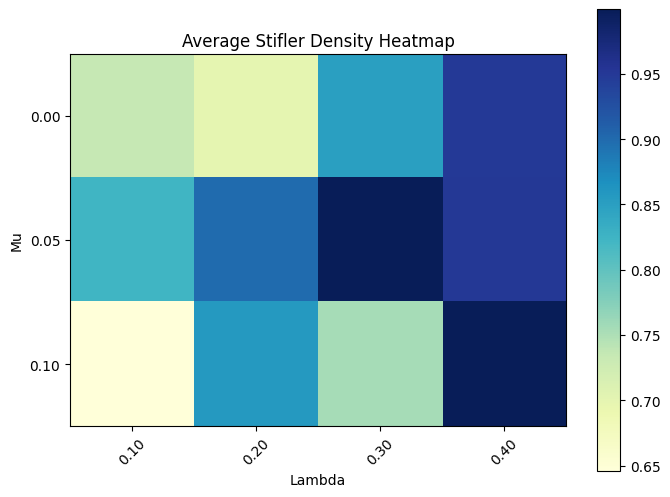

In [ ]:
n_samp = 20
alp = 1

# Set the mu and lambda_values
mu_values = np.arange(0.0, 0.15, 0.05)
lambda_values = np.arange(0.1, 0.5, 0.1)

# Initialize the result array
results = np.zeros((len(mu_values), len(lambda_values)))

# Iterate over mu and lambda values
for i, mu in enumerate(mu_values):
    for j, lam in enumerate(lambda_values):
        rho_R_av, t_end_av = rumor_hyperedge_2(H3, degrees3, mu, lam, alp, n_samp)
        results[i, j] = rho_R_av

import matplotlib.ticker as ticker

# Plot the heat map
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(results, cmap='YlGnBu', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(lambda_values)))
ax.set_yticks(np.arange(len(mu_values)))

# Format the tick labels with two decimal places using string formatting
lambda_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
mu_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lambda_formatter)
ax.yaxis.set_major_formatter(mu_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in lambda_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in mu_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('Lambda')
ax.set_ylabel('Mu')
ax.set_title('Average Stifler Density Heatmap')

# Display the heat map
plt.show()

Sampling result - Lam: 0.1 N_rec: 375 t_end: 372.9930148377415 stifler_frac: 0.9375
Sampling result - Lam: 0.1 N_rec: 1 t_end: 378.617206995272 stifler_frac: 0.0025
Sampling result - Lam: 0.1 N_rec: 399 t_end: 817.6490097435569 stifler_frac: 0.9975
Sampling result - Lam: 0.1 N_rec: 398 t_end: 1213.0273264292796 stifler_frac: 0.995
Sampling result - Lam: 0.1 N_rec: 393 t_end: 1577.6012906351507 stifler_frac: 0.9825
Sampling result - Lam: 0.1 N_rec: 1 t_end: 1587.9310192457228 stifler_frac: 0.0025
Sampling result - Lam: 0.1 N_rec: 396 t_end: 2008.378735509718 stifler_frac: 0.99
Sampling result - Lam: 0.1 N_rec: 381 t_end: 2400.664174942526 stifler_frac: 0.9525
Sampling result - Lam: 0.1 N_rec: 394 t_end: 2626.602112751907 stifler_frac: 0.985
Sampling result - Lam: 0.1 N_rec: 398 t_end: 2983.343791156466 stifler_frac: 0.995
Sampling result - Lam: 0.1 N_rec: 372 t_end: 3497.430913558938 stifler_frac: 0.93
Sampling result - Lam: 0.1 N_rec: 391 t_end: 3862.964641714384 stifler_frac: 0.9775
S

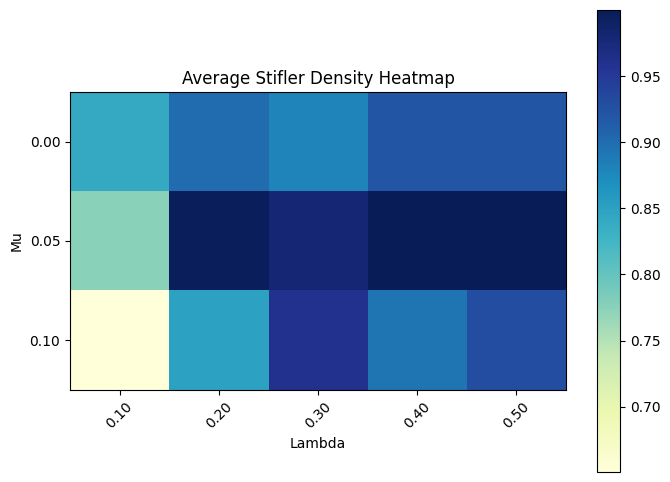

In [ ]:
n_samp = 50
alp = 1

# Set the mu and lambda_values
mu_values = np.arange(0.0, 0.15, 0.05)
lambda_values = np.arange(0.1, 0.6, 0.1)

# Initialize the result array
results = np.zeros((len(mu_values), len(lambda_values)))

# Iterate over mu and lambda values
for i, mu in enumerate(mu_values):
    for j, lam in enumerate(lambda_values):
        rho_R_av, t_end_av = rumor_hyperedge_2(H3, degrees3, mu, lam, alp, n_samp)
        results[i, j] = rho_R_av

import matplotlib.ticker as ticker

# Plot the heat map
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(results, cmap='YlGnBu', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(lambda_values)))
ax.set_yticks(np.arange(len(mu_values)))

# Format the tick labels with two decimal places using string formatting
lambda_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
mu_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lambda_formatter)
ax.yaxis.set_major_formatter(mu_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in lambda_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in mu_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('Lambda')
ax.set_ylabel('Mu')
ax.set_title('Average Stifler Density Heatmap')

# Display the heat map
plt.show()

In [ ]:
n_samp = 100
alp = 1

# Set the mu and lambda_values
mu_values = np.arange(0.0, 0.15, 0.03)
lambda_values = np.arange(0.1, 0.5, 0.05)

# Initialize the result array
results = np.zeros((len(mu_values), len(lambda_values)))

# Iterate over mu and lambda values
for i, mu in enumerate(mu_values):
    for j, lam in enumerate(lambda_values):
        rho_R_av, t_end_av = rumor_hyperedge_2(H3, degrees3, mu, lam, alp, n_samp)
        print("Average result - mu", mu, "lam", lam,  "stifler_frac:", rho_R_av)
        results[i, j] = rho_R_av

import matplotlib.ticker as ticker

# Plot the heat map
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(results, cmap='YlGnBu', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(lambda_values)))
ax.set_yticks(np.arange(len(mu_values)))

# Format the tick labels with two decimal places using string formatting
lambda_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
mu_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lambda_formatter)
ax.yaxis.set_major_formatter(mu_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in lambda_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in mu_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('Lambda')
ax.set_ylabel('Mu')
ax.set_title('Average Stifler Density Heatmap')

# Display the heat map
plt.show()

Average result - mu 0.0 lam 0.1 stifler_frac: 0.8288749999999996
Average result - mu 0.0 lam 0.15000000000000002 stifler_frac: 0.7943250000000001
Average result - mu 0.0 lam 0.20000000000000004 stifler_frac: 0.9076000000000002
Average result - mu 0.0 lam 0.25000000000000006 stifler_frac: 0.9191250000000002
Average result - mu 0.0 lam 0.30000000000000004 stifler_frac: 0.9196000000000004
Average result - mu 0.0 lam 0.3500000000000001 stifler_frac: 0.9097999999999999
Average result - mu 0.0 lam 0.40000000000000013 stifler_frac: 0.929825
Average result - mu 0.0 lam 0.45000000000000007 stifler_frac: 0.8802749999999999
Average result - mu 0.03 lam 0.1 stifler_frac: 0.8581249999999998
Average result - mu 0.03 lam 0.15000000000000002 stifler_frac: 0.9033500000000007
Average result - mu 0.03 lam 0.20000000000000004 stifler_frac: 0.9271000000000005
Average result - mu 0.03 lam 0.25000000000000006 stifler_frac: 0.9782000000000007
Average result - mu 0.03 lam 0.30000000000000004 stifler_frac: 0.93